In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
kalite=ctrl.Antecedent(np.arange(0,11,1),"kalite")#Giriş
servis=ctrl.Antecedent(np.arange(0,11,1),"servis")#Giriş
bahşiş=ctrl.Consequent(np.arange(0,26,1),"bahşiş")#Çıkış değeri olduğu için Consequent fonk kullanıldı

In [ ]:
kalite.automf(3)
servis.automf(3)

In [ ]:
bahşiş["düşük"]=fuzz.trimf(bahşiş.universe,[0,0,13])
bahşiş["orta"]=fuzz.trimf(bahşiş.universe,[0,13,25])
bahşiş["yüksek"]=fuzz.trimf(bahşiş.universe,[13,25,25])

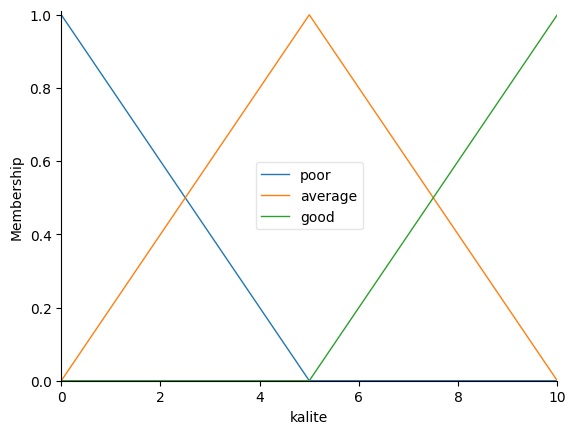

In [ ]:
kalite.view()

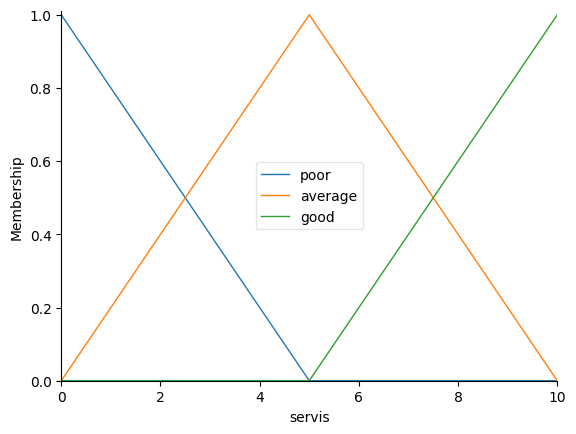

In [ ]:
servis.view()

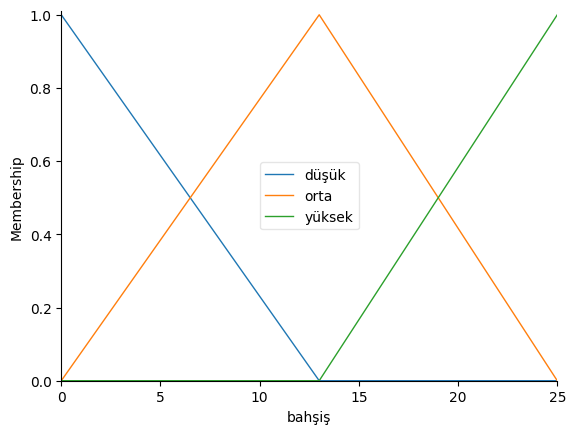

In [ ]:
bahşiş.view()

In [ ]:
kural1=ctrl.Rule(kalite["poor"]|servis["poor"],bahşiş["düşük"])
kural2=ctrl.Rule(kalite["average"],bahşiş["orta"])
kural3=ctrl.Rule(kalite["good"]|servis["good"],bahşiş["yüksek"])

In [ ]:
bahşişKontrol=ctrl.ControlSystem([kural1,kural2,kural3])
bahşişBelirleme=ctrl.ControlSystemSimulation(bahşişKontrol)

In [ ]:
bahşişBelirleme.input["kalite"] = 3.5
bahşişBelirleme.input["servis"] = 3.2

bahşişBelirleme.compute()
print(bahşişBelirleme.output["bahşiş"])

11.874356393074736


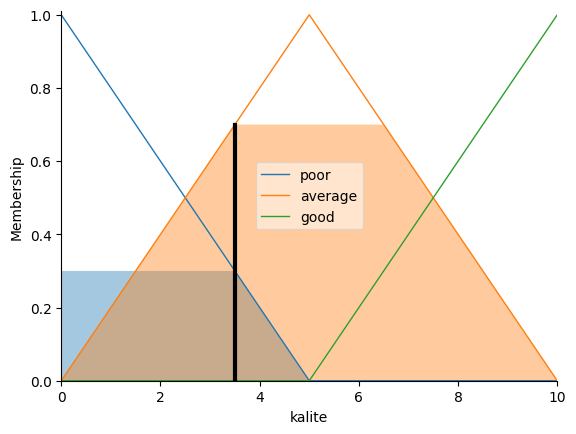

In [ ]:
kalite.view(bahşişBelirleme)